In [2]:
import pandas as pd

import os

# Merge all 12 months of sales data into single csv file1

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data , df])

# all_months_data.head()

all_months_data.to_csv("all_data.csv",index = False)
# df.head()

# read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


clean up data

drop down of NaN

In [5]:
# nan_df = all_data[all_data.isna().any(axis=1)]

# nan_df.head()

all_data = all_data.dropna(how = 'all')

# all_data.dropna(how = 'all' , inplace = True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


find or and delete it

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


convert columns to the correct type

In [7]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

#all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

all_data['Price Each'] = all_data['Price Each'].astype('float')

#all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

task 2 : add month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


task 3 : add a sales column

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


task 4: add city column

In [10]:
# all_data['City'] = all_data['Purchase Address'].str.split(",", expand = True)[1]
  
all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(",")[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


task 5 : add state as well

In [16]:
def getCity(address):
    return address.split(',')[1]

def getState(address):
    return address.split(',')[2][0:3]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : getCity(x) + ' ' + getState(x))

# all_data.drop('City', axis= 1, inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


Qn 1 : what was the best month for sales? how much was earned that month?

In [18]:
results = all_data.groupby('Month').sum()

# .max()


Text(0.5, 0, 'Month Number')

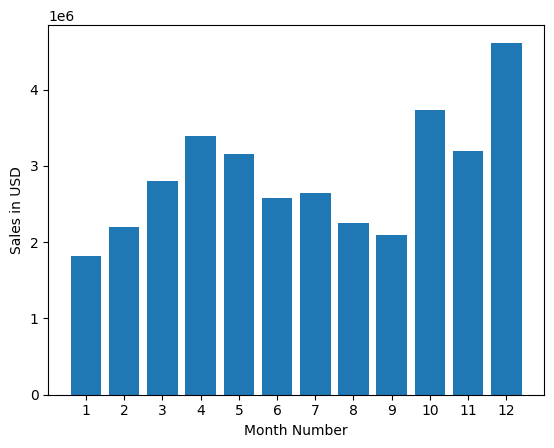

In [19]:
import matplotlib.pyplot as plt
month = range(1,13)
plt.bar(month , results['Sales'])

plt.xticks(month)

plt.ylabel('Sales in USD')
plt.xlabel('Month Number')

what city had highest number of sales?

In [20]:
city_res = all_data.groupby('City').sum()
# city_name = city_res.index

city_res

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


Text(0.5, 0, 'City Name')

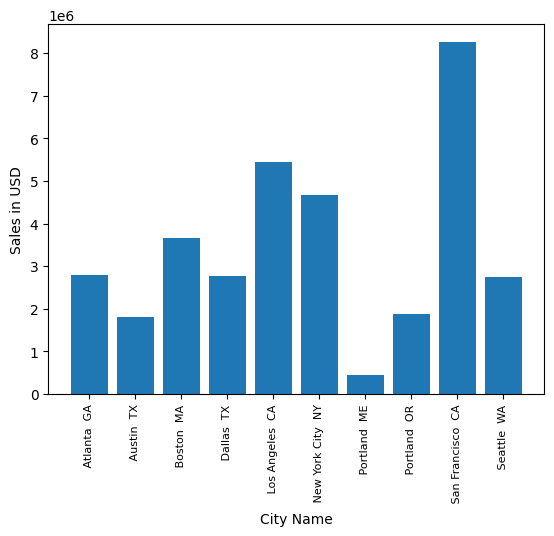

In [67]:
# plt.figure(figsize = (10 ,8))
# cities = all_data['City'].unique()

cities = [city for city , df in all_data.groupby('City')]
# plt.bar(city_res.index, city_res['Sales'])


plt.bar(cities, city_res['Sales'])

plt.xticks(cities , rotation = 'vertical' , size = 8)

# plt.xticks(city_res.index)

plt.ylabel('Sales in USD')
plt.xlabel('City Name')

Qn 5: what time should we display advertisments to maximize likelihood of customer's buying product ?

In [29]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [32]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


Text(0, 0.5, 'Number of Orders')

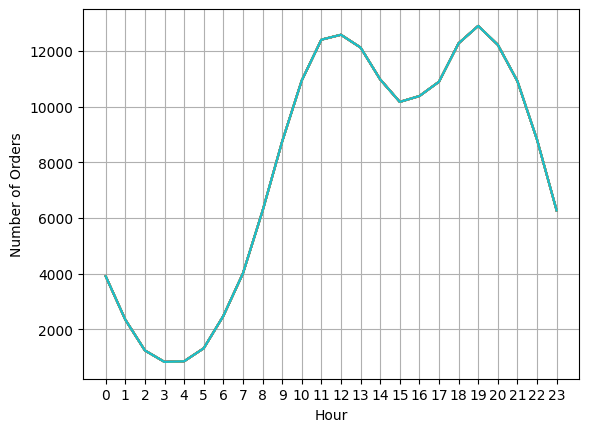

In [41]:
hours = [hour for hour , df in all_data.groupby('Hour')]
# cities = [city for city , df in all_data.groupby('City')]


plt.plot(hours , all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()

plt.xlabel('Hour')
plt.ylabel('Number of Orders')

# all_data.groupby(['Hour']).count()

qn 4: what products are most often sold ?

In [46]:
all_data.groupby(['Product']).count()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
Product,,,,,,,,,,
20in Monitor,4101,4101,4101,4101,4101,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577,20577
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641,20641,20641
Apple Airpods Headphones,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325,13325,13325,13325,13325,13325
Flatscreen TV,4800,4800,4800,4800,4800,4800,4800,4800,4800,4800


Text(0, 0.5, 'Number of Orders')

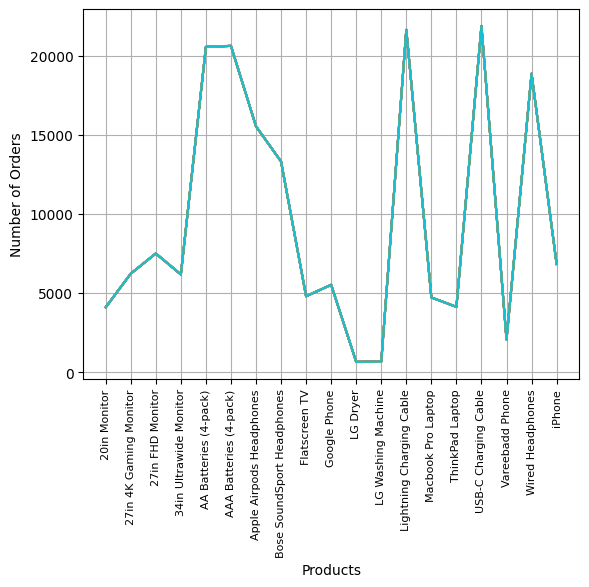

In [50]:
pdts = [pdt for pdt , df in all_data.groupby('Product')]
# cities = [city for city , df in all_data.groupby('City')]


plt.plot(pdts , all_data.groupby(['Product']).count())

plt.xticks(pdts, rotation = 'vertical' , size = 8)
plt.grid()

plt.xlabel('Products')
plt.ylabel('Number of Orders')

qn 4.1: what products are most often sold together?

In [58]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]


df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


df = df[['Order ID' , 'Grouped']].drop_duplicates()
df.head(10)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [63]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

what product sold the most? why do you think it sold the most?

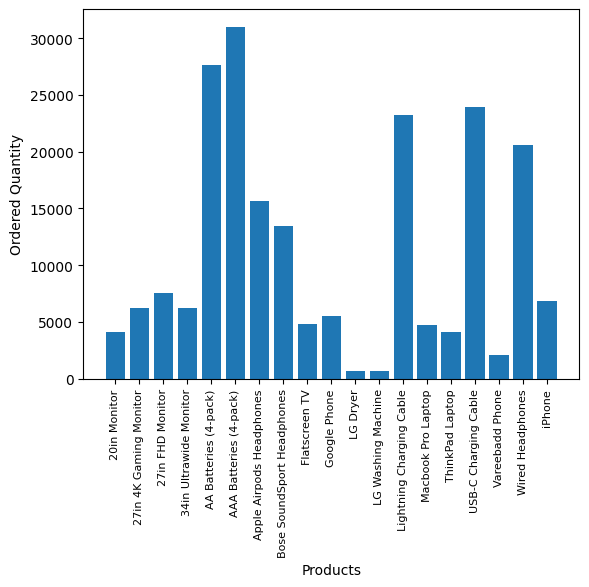

In [70]:

product_group = all_data.groupby(['Product'])
quantity_order = product_group.sum()['Quantity Ordered']


products = [product for product , df in product_group]

plt.bar(products, quantity_order)


plt.xticks(products , rotation = 'vertical' , size = 8)

plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

plt.show()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


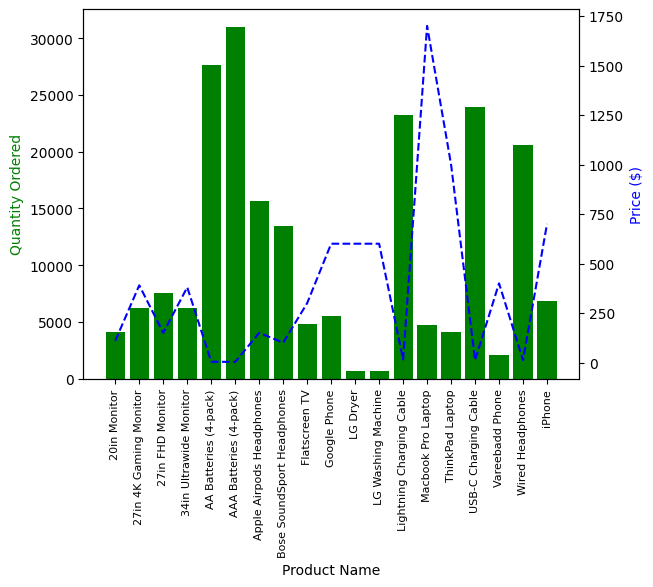

In [78]:
prices = all_data.groupby('Product').mean()['Price Each']

# print(prices)

fig , ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_order, color='g')

ax2.plot(products , prices , 'b--')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered' , color = 'g')
ax1.set_xticklabels(products , rotation = 'vertical' , size = 8)
ax2.set_ylabel('Price ($)' , color = 'b')

plt.show()